<p style="text-align:center;font-size:18px"><b>
    Project 1 : Mercedes-Benz Greener Manufacturing <br>
    <br>
    By : Shraman Gupta</b>
</p>

<h3> Description </h3>

<b>Reduce the time a Mercedes-Benz spends on the test bench.</b>

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. <b> However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. </b>

<b> You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards. </b>

<h3> Import Libraries and Packages</h3>

In [1]:
#General Data science packages

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#Scikit-Learn packages

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

<h3> Training Data Read and Check </h3>

In [2]:
df_train = pd.read_csv('train.csv') #  Reading training data

print('Mercedes-Benz Greener Manufacturing training data has %.f rows and %.f columns'%(df_train.shape[0],df_train.shape[1]))
df_train.head() #printing first five rows of training data

Mercedes-Benz Greener Manufacturing training data has 4209 rows and 378 columns


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Checking statistical data for training set

df_train.describe() #statistical description of data

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looking at the above training data, we have two variables <b> ID and y </b> and rest other columns are parameters that are different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. <br>
<br>
<b> ID </b> is the bench test ID that is not given in order in the dataset<br>
<b> y </b> is the target value (number of seconds taken to perform the test)

<h3> Data Feature Analysis (EDA)</h3>

In [4]:
# Let us remove ID and y (target) as features starting with 'X' are parameters in a Mercedes-Benz car 
# to predict the time it takes to pass testing

y=df_train['y']

column_not_use=list(set(df_train.columns) - set(['ID', 'y']))

df_train_features = df_train[column_not_use]
print('The number of features in training dataset are: ',len(df_train_features.columns))
print('Feature  Data Types :\n---------------\n',df_train_features.dtypes.value_counts())

The number of features in training dataset are:  376
Feature  Data Types :
---------------
 int64     368
object      8
dtype: int64


So we have <b> 376 features (marked with X)</b> out of which <b>368 are integer variables</b> and <b>8 object (string) variables</b> for training dataset

In [5]:
# Checking and counting data in each column

Count_Matrix = [[], [], []] # Initializing empty matrix for counting data
for a in df_train_features: #creating loop for each feature 'X' as a in df_train_features
    d_type = df_train_features[a].dtype #checking data type of that feature
    d_unique = len(np.unique(df_train_features[a])) #having total unique values in the features
    if d_unique == 1: # if total unique is one then feature is constant
        Count_Matrix[0].append(a)
    elif d_unique == 2 and d_type == np.int64: # if total unique is binary (two values), then it is referred as Binary 
        Count_Matrix[1].append(a)
    else:
        Count_Matrix[2].append(a) # Else total unique values expect 1 and 2 is categorized as Categorical features

print('Features (constant value): {} \nFeatures (Binary): {}\nFeatures (Categorical): {}\n'
      .format(*[len(a) for a in Count_Matrix]))
print('Features (constant value):\n---------------------\n', Count_Matrix[0],'\n')
print('Features (Categorical):\n---------------------\n', Count_Matrix[2])

Features (constant value): 12 
Features (Binary): 356
Features (Categorical): 8

Features (constant value):
---------------------
 ['X297', 'X11', 'X107', 'X290', 'X330', 'X268', 'X289', 'X93', 'X347', 'X233', 'X293', 'X235'] 

Features (Categorical):
---------------------
 ['X8', 'X5', 'X3', 'X4', 'X0', 'X6', 'X2', 'X1']


Interestingly, out of <b> 376 features </b>, we have <b>12 (constant)</b>, <b>356 (Binary)</b> and <b>8 (Categorical)</b> <br>

So we can leave constant values features unless they need to used in unsupervised learning or anomaly detection

<h4> Target Variable (EDA)</h4>

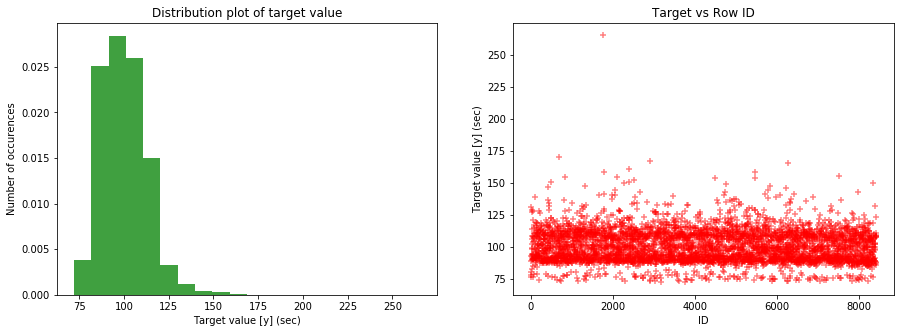

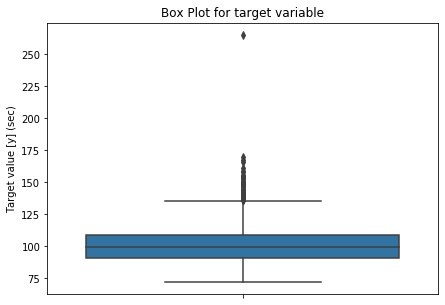

In [6]:
# Let us check on target value (y)

y_df_train = df_train['y'].values
ID_df_train = df_train['ID'].values

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax1.hist(y_df_train,bins=20,density=True, facecolor='g', alpha=0.75)

ax1.set_xlabel('Target value [y] (sec)');
ax1.set_ylabel('Number of occurences');
ax1.set_title('Distribution plot of target value')

ax2.scatter(ID_df_train, y_df_train, marker='+', c='r', alpha=0.5)

ax2.set_xlabel('ID');
ax2.set_ylabel('Target value [y] (sec)');
ax2.set_title('Target vs Row ID');

#-----------------------------------------------------------------------#
plt.figure(figsize=(7,5))

sns.boxplot(y=y_df_train)

plt.ylabel('Target value [y] (sec)');
plt.title('Box Plot for target variable');
plt.show()

We can see that most of the tests are conducted <b> between 80-120 seconds (avg 100) </b> and there is one test that is an outlier at <b> 265 seconds </b> (as seen predominantly in scatter plot)

<h4> Categorical Variable (EDA)</h4>

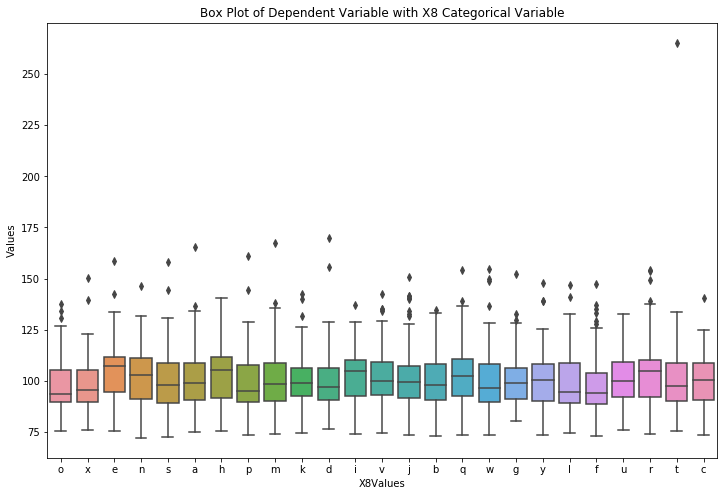

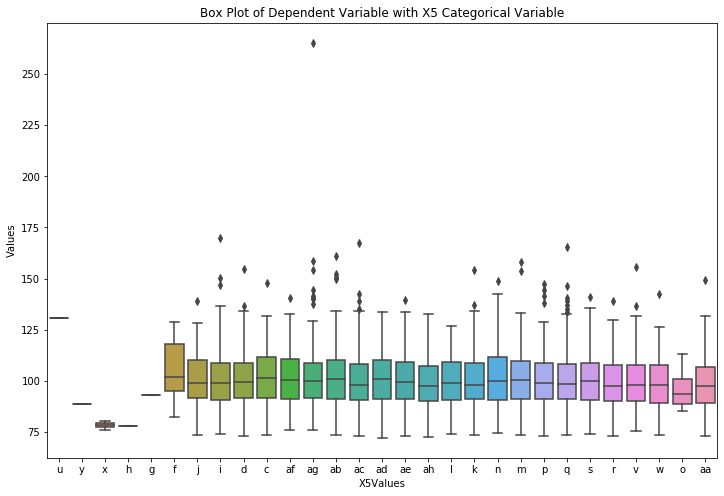

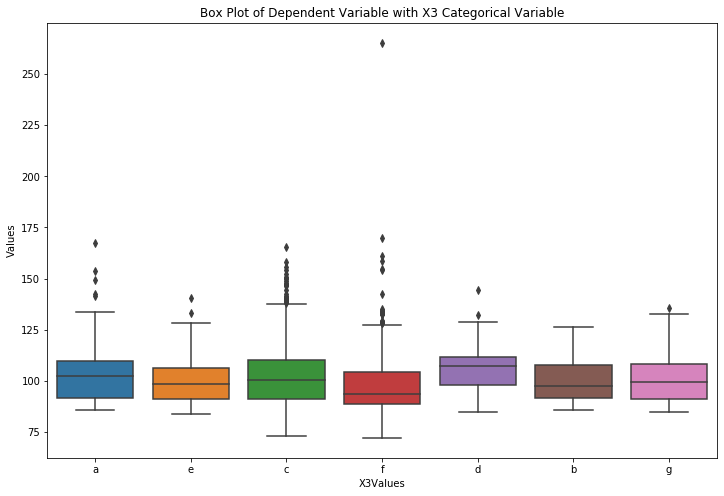

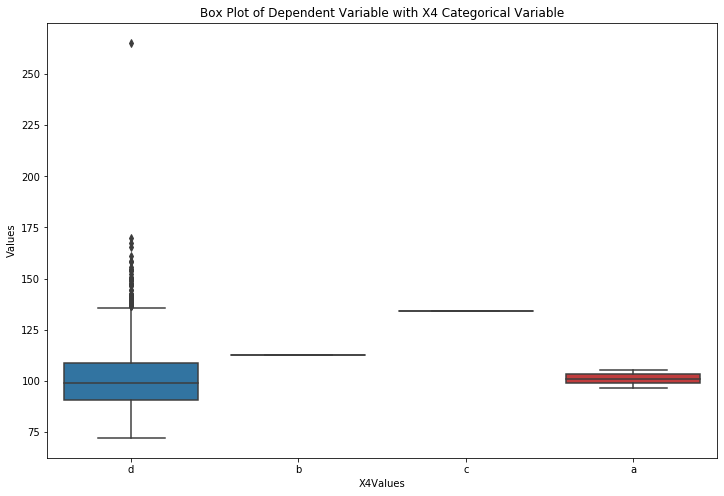

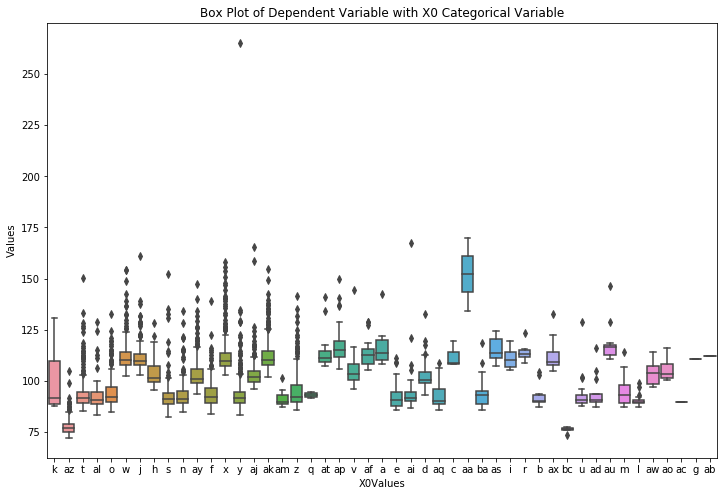

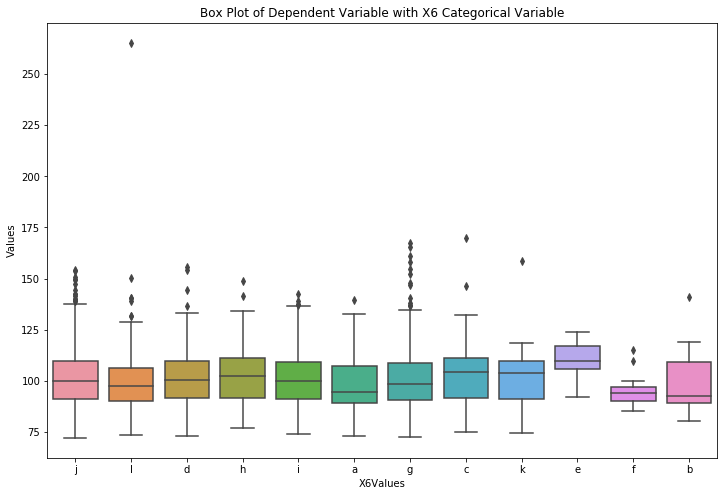

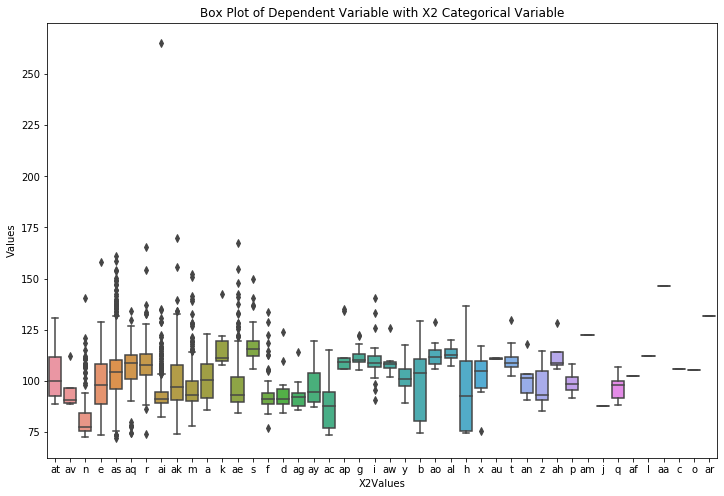

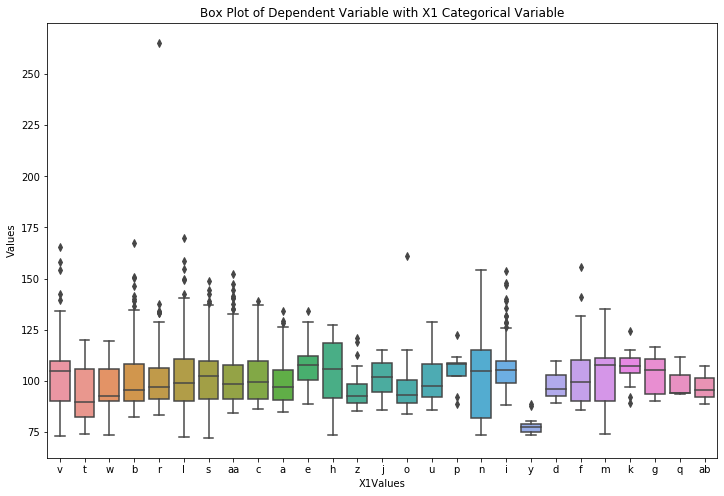

In [7]:
for i in Count_Matrix[2]:
    plt.figure(figsize=(12,8))
    sns.boxplot(y=y,x=df_train_features[i])
    plt.xlabel(i + "Values")
    plt.ylabel("Values")
    plt.title("Box Plot of Dependent Variable with "+ i + " Categorical Variable")

We can see with categorical variable analysis, X4 has very low variance

<h4> Checking Missing Values (EDA)</h4>

In [8]:
#Checking missing data
def dataset(set):
    null_sum = set.isnull().sum() #sum wise
    null_count = set.isnull().count() #count wise
    null_percent = null_sum/null_count*100
    return null_sum,null_count,null_percent
def check(set):
    if set.isnull().any().any():
        print("There are missing values in the dataframe")
    else:
        print("There are no missing values in the dataframe")
    
print(check(df_train_features))
print(dataset(df_train_features)[0])

pd.concat([dataset(df_train_features)[0], dataset(df_train_features)[2]],axis=1,keys=['Total','Percent']).transpose()

There are no missing values in the dataframe
None
X105    0
X275    0
X70     0
X135    0
X102    0
       ..
X288    0
X109    0
X184    0
X309    0
X181    0
Length: 376, dtype: int64


,X105,X275,X70,X135,X102,X253,X48,X339,X66,X111,...,X208,X57,X383,X168,X326,X288,X109,X184,X309,X181
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


So we have <b> NO NULL VALUES </b> in our training and testing dataset

<h4> Removing features with constant value or zero variance</h4>

In [9]:
columns=list(set(df_train.columns) - set(['ID', 'y']))

print('The no. of features in out dataset BEFORE constant features removal: ',df_train_features.shape[1])

for b in columns:
    d_unique1 = len(np.unique(df_train_features[b])) #having total unique values in the features
    if d_unique1 == 1: # if total unique is one then feature is constant
        df_train_features=df_train_features.drop(b,axis=1) #drop constant values

df_train_features #after removing constant features
print('The no. of features in out dataset AFTER constant features removal: ',df_train_features.shape[1])

The no. of features in out dataset BEFORE constant features removal:  376
The no. of features in out dataset AFTER constant features removal:  364


<h4> Removing duplicate columns</h4>

In [10]:
df_train_new=df_train_features.T.drop_duplicates().T # removing columns that are duplicate or are same, so to improve prediction later resut

In [11]:
df_train_new.shape #checking the modified number of columns now

(4209, 319)

In [12]:
#List of removed columns (features) from the original training dataset

rem_col = list(set(df_train_features.columns)-set(df_train_new.columns))
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame(rem_col).T


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
0,X113,X199,X279,X365,X118,X240,X134,X60,X147,X35,X53,X295,X262,X299,X88,X214,X44,X360,X76,X248,X254,X17,X39,X29,X84,X122,X58,X31,X89,X172,X222,X385,X242,X152,X247,X71,X67,X239,X227,X243,X326,X90,X184,X138,X216


<h4> Total removed columns </h4>

In [13]:
#Checking total number of columns removed after Data feature analysis

print('Total number of features removed:', df_train.shape[1]-df_train_new.shape[1])
print('Features removed:\n',set(df_train.columns)-set(df_train_new))

rem_total_col=list(set(df_train.columns)-set(df_train_new))

Total number of features removed: 59
Features removed:
 {'X113', 'X268', 'X199', 'X279', 'X365', 'X118', 'X240', 'X134', 'X297', 'X60', 'X147', 'X35', 'X53', 'X289', 'X295', 'X262', 'X299', 'X88', 'X214', 'X93', 'X44', 'X360', 'X76', 'X248', 'X254', 'y', 'X17', 'X347', 'X233', 'X39', 'X29', 'X84', 'X122', 'X58', 'X31', 'X290', 'X89', 'X293', 'X172', 'X222', 'X385', 'X242', 'X330', 'X247', 'X152', 'X71', 'X11', 'X67', 'X239', 'X227', 'X243', 'X326', 'X107', 'X90', 'X184', 'X138', 'X216', 'X235', 'ID'}


<h3> Testing Dataset </h3>

In [14]:
df_test = pd.read_csv('test.csv') #  Reading testing data

print('Mercedes-Benz Greener Manufacturing test data has %.f rows and %.f columns'%(df_test.shape[0],df_test.shape[1]))
df_test.head() #printing first five rows of testing data

Mercedes-Benz Greener Manufacturing test data has 4209 rows and 377 columns


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,

In [15]:
# Drop ID columns
columns_test=list(set(df_test.columns) - set(['ID']))
df_test_features = df_test[columns_test]
print('The number of features in testing dataset are: ',len(df_test_features.columns))
print('Feature  Data Types :\n---------------\n',df_test_features.dtypes.value_counts())

The number of features in testing dataset are:  376
Feature  Data Types :
---------------
 int64     368
object      8
dtype: int64


Here we need to drop only <b> ID column </b> and test data doesn't have target variable <b> y </b> so it needs to be predicted in the output 

In [16]:
#Defining removed columns from training dataset

rem_cols_T = []

rem_col = list(set(df_train_features.columns)-set(df_train_new.columns))

rem_cols_T.extend(rem_col)

In [17]:
#Removing and checking the features used before and after removal of remvoed columns
#To make sure that both training and testing dataset has same features.

print('The no. of features in out dataset BEFORE constant features removal: ',df_test_features.shape[1])

df_test_new=df_test.drop(rem_cols_T,axis=1)

print('The no. of features in out dataset AFTER constant features removal: ',df_test_new.shape[1])

The no. of features in out dataset BEFORE constant features removal:  376
The no. of features in out dataset AFTER constant features removal:  332


In [18]:
df_test_new=df_train_features.T.drop_duplicates().T #Further removing the duplicate columns as well from the testdata

In [19]:
df_test_new.shape

(4209, 319)

So number of features are same as training dataset , so the shape of both datasets <b> (4209, 319) </b>

<h3> Label Encoding </h3>

In [20]:
#Here we will apply label encoding using LabelEncoder for only categorical features (8 features)
# and will apply fit_transform

from sklearn.preprocessing import LabelEncoder

df_train_new_categorical = df_train_new[['X5', 'X2', 'X3', 'X6', 'X8', 'X0', 'X1', 'X4']]
df_train_encoded=df_train_new_categorical.apply(LabelEncoder().fit_transform)
df_test_new_categorical = df_test_new[['X5', 'X2', 'X3', 'X6', 'X8', 'X0', 'X1', 'X4']]
df_test_encoded=df_test_new_categorical.apply(LabelEncoder().fit_transform)

In [21]:
# Optional step: We can normalize the encoded categorical variables between 0 and 1 using min-max method
# We choose between 0 and 1 as other features are binary 0,1

#Normalizing encoded training dataset
normalized_df=(df_train_encoded-df_train_encoded.min())/(df_train_encoded.max()-df_train_encoded.min())
normalized_df.head()

,X5,X2,X3,X6,X8,X0,X1,X4
0,0.857143,0.395349,0.000000,0.818182,0.583333,0.695652,0.884615,1.0
1,1.000000,0.441860,0.666667,1.000000,0.583333,0.695652,0.807692,1.0
2,0.964286,0.790698,0.333333,0.818182,0.958333,0.434783,0.923077,1.0
3,0.964286,0.790698,0.833333,1.000000,0.166667,0.434783,0.807692,1.0
4,0.428571,0.790698,0.833333,0.272727,0.541667,0.434783,0.884615,1.0


In [22]:
#Normalizing encoded testing dataset

normalized_df_test=(df_test_encoded-df_test_encoded.min())/(df_test_encoded.max()-df_test_encoded.min())
normalized_df_test.head()

,X5,X2,X3,X6,X8,X0,X1,X4
0,0.857143,0.395349,0.000000,0.818182,0.583333,0.695652,0.884615,1.0
1,1.000000,0.441860,0.666667,1.000000,0.583333,0.695652,0.807692,1.0
2,0.964286,0.790698,0.333333,0.818182,0.958333,0.434783,0.923077,1.0
3,0.964286,0.790698,0.833333,1.000000,0.166667,0.434783,0.807692,1.0
4,0.428571,0.790698,0.833333,0.272727,0.541667,0.434783,0.884615,1.0


In [23]:
#Replacing the training dataset categorical values with the normalized values

df_train_new[['X5', 'X2', 'X3', 'X6', 'X8', 'X0', 'X1', 'X4']]=normalized_df[['X5', 'X2', 'X3', 'X6', 'X8', 'X0', 'X1', 'X4']]

In [24]:
#Checking the training data categorical values

df_train_new[['X5', 'X2', 'X3', 'X6', 'X8', 'X0', 'X1', 'X4']].head()

,X5,X2,X3,X6,X8,X0,X1,X4
0,0.857143,0.395349,0.000000,0.818182,0.583333,0.695652,0.884615,1.0
1,1.000000,0.441860,0.666667,1.000000,0.583333,0.695652,0.807692,1.0
2,0.964286,0.790698,0.333333,0.818182,0.958333,0.434783,0.923077,1.0
3,0.964286,0.790698,0.833333,1.000000,0.166667,0.434783,0.807692,1.0
4,0.428571,0.790698,0.833333,0.272727,0.541667,0.434783,0.884615,1.0


In [25]:
df_train_new.shape

(4209, 319)

In [26]:
#Similarly, we modify test dataset for categroical features

df_test_new[['X5', 'X2', 'X3', 'X6', 'X8', 'X0', 'X1', 'X4']]=normalized_df_test[['X5', 'X2', 'X3', 'X6', 'X8', 'X0', 'X1', 'X4']]
df_test_new[['X5', 'X2', 'X3', 'X6', 'X8', 'X0', 'X1', 'X4']].head()


,X5,X2,X3,X6,X8,X0,X1,X4
0,0.857143,0.395349,0.000000,0.818182,0.583333,0.695652,0.884615,1.0
1,1.000000,0.441860,0.666667,1.000000,0.583333,0.695652,0.807692,1.0
2,0.964286,0.790698,0.333333,0.818182,0.958333,0.434783,0.923077,1.0
3,0.964286,0.790698,0.833333,1.000000,0.166667,0.434783,0.807692,1.0
4,0.428571,0.790698,0.833333,0.272727,0.541667,0.434783,0.884615,1.0


In [27]:
df_test_new.shape

(4209, 319)

<h3> Perform dimensionality reduction using PCA </h3>

In [28]:
n_comp = 12 # we used 12 PC components for dimenisonal reduction
pca = PCA(n_components=n_comp, random_state=42)
pca2_results_train = pca.fit_transform(df_train_new) #Modified PCA + Label encoded training dataset
pca2_results_test = pca.transform(df_test_new) #Modified PCA + Label encoded testing dataset

#Checking the variance of PC components
print('The variance values of PC components are:\n',pca.explained_variance_ratio_)

The variance values of PC components are:
 [0.13405771 0.0898854  0.08432206 0.067144   0.05292883 0.04587262
 0.03509923 0.03354916 0.02663522 0.02501442 0.02295924 0.01891897]


<h3> Applying XGBoost Model to predict the values </h3>

In [29]:
#Before applying XGBoost

#For XGBoost to run efficiently, we have to convert our dataset to DMatrix format
#Dmatrix format is data structure unique for xgboost algorithm

y_train=df_train['y']
y_mean =y_train.mean()
D_train = xgb.DMatrix(pca2_results_train,label=y_train)
D_test = xgb.DMatrix(pca2_results_test)

#intialize set of parameters - we did GridSearchCV to hypertune certain parameters but here we changed only few parameters
#to achieve acceptable accuracy and avoid overfitting

param={'n_trees':600,'subsample':0.95,'eta':0.0025,'max_depth':4,'n_estimators':500,
       'eval_metric':'rmse','objective': 'reg:tweedie','base_score': y_mean}

xgb_model=xgb.XGBClassifier() #initializing XGB model
xgb_model = xgb.train(param, D_train,1500) #training the xgb model using training DMatrix
y_xgb_pred = xgb_model.predict(D_test) #Predicting the trained model on test dataset

In [30]:
#Checking the target produced
ID = df_test['ID']

submission_xgb = pd.DataFrame()
submission_xgb["ID"] = ID # For ID column
submission_xgb["Predicted Value (y)"] = y_xgb_pred # for predicted values column

submission_xgb.head()

,ID,Predicted Value (y)
0,1,105.360390
1,2,96.706635
2,3,79.426926
3,4,78.334686
4,5,79.900574


In [31]:
cv_result = xgb.cv(param, 
                   D_train, 
                   num_boost_round=1000, # increase to have better results (~700)
                   early_stopping_rounds=50,
                   verbose_eval=50, 
                   show_stdv=False
                  )

num_boost_rounds = len(cv_result)
print(num_boost_rounds)

[0]	train-rmse:12.6638	test-rmse:12.6614
[50]	train-rmse:12.0709	test-rmse:12.0994
[100]	train-rmse:11.5845	test-rmse:11.6465
[150]	train-rmse:11.1798	test-rmse:11.2726
[200]	train-rmse:10.833	test-rmse:10.9573
[250]	train-rmse:10.5327	test-rmse:10.6928
[300]	train-rmse:10.2666	test-rmse:10.4673
[350]	train-rmse:10.0299	test-rmse:10.2725
[400]	train-rmse:9.81183	test-rmse:10.104
[450]	train-rmse:9.60775	test-rmse:9.9491
[500]	train-rmse:9.40622	test-rmse:9.80646
[550]	train-rmse:9.22164	test-rmse:9.68157
[600]	train-rmse:9.05512	test-rmse:9.57526
[650]	train-rmse:8.90451	test-rmse:9.48274
[700]	train-rmse:8.76423	test-rmse:9.4029
[750]	train-rmse:8.63841	test-rmse:9.3353
[800]	train-rmse:8.52127	test-rmse:9.27752
[850]	train-rmse:8.41383	test-rmse:9.2286
[900]	train-rmse:8.31433	test-rmse:9.18637
[950]	train-rmse:8.22533	test-rmse:9.15133
[999]	train-rmse:8.14452	test-rmse:9.12099
1000


In [32]:
#Checking the accuracy for Regression model

from sklearn.metrics import r2_score

print('Accuracy for XGB model: ',r2_score(y,y_xgb_pred))

Accuracy for XGB model:  0.6158315603186624


<h3> Conclusion </h3>

In this project, we did following steps to achieve the objective to reduce the time taking to conduct a bench test:

   a) Studied trained data and checked features columns, ID and y (target)
   b) Perform extensive Exploratory Data Analysis (EDA) and removed ID and y (target) and other 57 columns on:
        1. Target Variable (1)
        2. Categorical variables (8)
        3. Checking missing values (No missing values)
        4. Removing features with zero variance (constant value columns-12)
        5. Removing columns that are similar (duplicated) - 45
   c) Removed same features on testing dataset as well to be consistent
   d) For categorical values, Label Encoding is implemented and normalized using min-max function (to be consistent with other features that have binary values [0,1])
   e) Performed dimensionality reduction using PCA (used 12 PC components)
   f) Applied XGBoost model 
        1. DMatrix for train and test dataset
        2. To train the model with D_train 
        3. Use the trained model on testing dataset to predict the target value (y)